# Numerics

Numpy is the core of the numerical Python ecosystem. It is critical for fast math operations, and avoid loops.

In [1]:
import numpy as np

x = np.arange(0,10)
x*x

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [2]:
x*x.reshape((-1,1))

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [3]:
x = np.arange(0,100)
%timeit -r1 -n 1000 x*x.reshape((-1,1))

37 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [4]:
%timeit -r1 -n 1000 [[i*j for i in range(100)] for j in range(100)]

905 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


Learn about broadcasting rules, and @vectorize, and generalized ufuncs and "fancy indexing".

## Take some time to "think" in higher dimension

Usually worth it, code is easier to read and write, more compact and often more correct. Want to see the power, look at numpy "einsum" for arbitrary dimentional tensor reductions.

## Numpy is also lingua franca for libraries to talk between each other. You may need some "glue" in numpy.

- Numpy on GPU == cuPy, or Rapids,    Same API, but narrower, drop in replacement but compute on GPU.

- Numpy on multi-core, multi node : Dask

- Numpy+Jit, Numba

-  `__array_function__` == "I can behave like numpy but"

## Dask

Low and high level API. Create a "Task Graph" and execute it on many cores, or machines.

In [5]:
from dask.distributed import Client

client = Client(n_workers=2)
client

Client Scheduler: tcp://127.0.0.1:62368,Cluster Workers: 2 Cores: 4 Memory: 17.18 GB


In [6]:
import dask.array as da
x = da.random.random((5000, 5000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(5000, 5000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [7]:
m = ((x+1)*x.T)

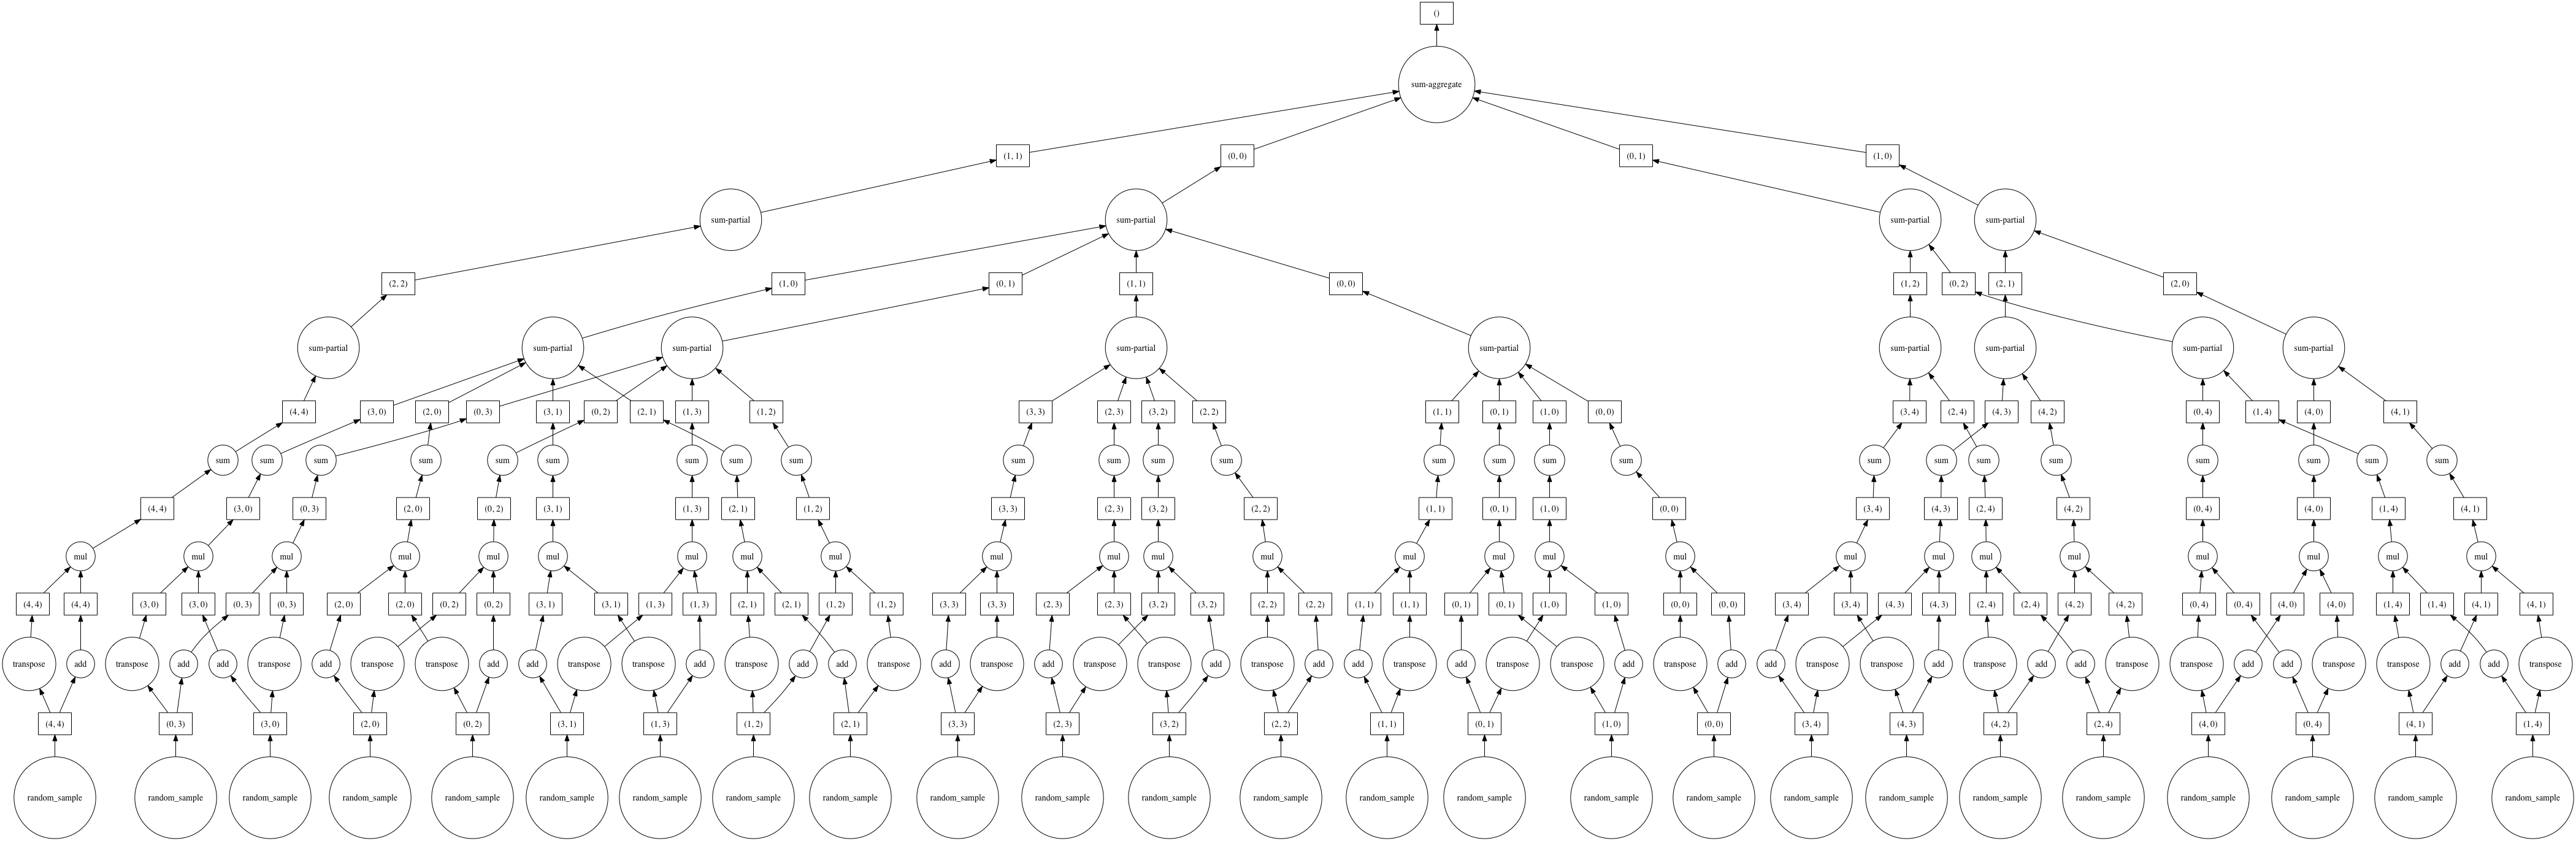

In [8]:
m.sum().visualize()

In [12]:
m[1,1].sum().compute()

0.4178074514985374

# Numba

non-vectorized fast code

In [13]:
from numba import jit
import numpy as np

In [14]:
def sum_all(data, N):
    s = 0
    for i in range(N):
        for j in range(N):
            s+=data[i,j]
    return s

In [15]:
N=100
x = np.arange(0,N)
x = x*x.reshape(-1,1)
x.shape

(100, 100)

In [16]:
%timeit sum_all(x, N)

4.33 ms ± 535 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
@jit
def sum_all_jit(data, N):
    s = 0
    for i in range(N):
        for j in range(N):
            s+=data[i,j]
    return s

In [18]:
len(sum_all_jit.get_annotation_info())

0

In [19]:
#run once to warm up the jit. THe compilation will actually be done now
sum_all_jit(x, N);

In [20]:
len(sum_all_jit.get_annotation_info())

1

In [21]:
%timeit sum_all_jit(x, N)

2 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
%timeit x.sum()

9.61 µs ± 678 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
